<a href="https://colab.research.google.com/github/rafaeldjsm/Data_Science/blob/master/chisqr_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
from scipy.stats import chisquare
from scipy.stats import norm
from scipy.stats import chi2

np.random.seed(1)

data = np.random.normal(loc = 20, scale = 5, size = 150)

mu_data = data.mean()

std_data = data.std(ddof = 1)

In [2]:
# Valor do Qui_quadrado para uma distribuição uniforme (mesma probabilidade para cada elemento)

# ref 
# https://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/chi-square-test-for-normality/


qstt = ((data - mu_data)**2)/mu_data
sum(qstt)

142.98840583926983

Notice how the value is the same as the cell above

In [3]:
# Observe como o valor é o mesmo da célula acima

# scipy.stats.chisquare(f_obs, f_exp=None, ddof=0, axis=0)
# Calculate a one-way chi-square test.
# The chi-square test tests the null hypothesis that the categorical data has the given ***frequencies***.


# f_exp : Expected frequencies in each category. By default the categories are assumed to be equally likely.

statistic, pvalue = chisquare(data)
statistic, pvalue

(142.98840583926986, 0.6233444674034908)

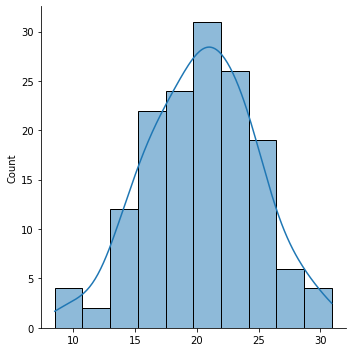

In [4]:
f_obs, bins = np.histogram(data, bins = 'auto')

sns.displot(data, bins=bins, kde=True);

Chi-square for Normality tests

In [5]:
# Frequencia acumulada esperada
xf_cum = norm.cdf(bins, loc = data.mean() , scale = data.std(ddof = 1))


# Cálculo da Frequência relativa esperada
f_exp_rel = ((np.roll(xf_cum, -1) - xf_cum)[:-1]) * len(data) 

# Cálculo da Frequência absoluta esperada
f_exp_abs = f_exp_rel  * len(data) / (f_exp_rel.sum())

In [6]:
alfa = 0.05

statistic_n, pvalue_n = chisquare(f_obs, f_exp = f_exp_abs)
statistic_n, pvalue_n

(6.961469737770473, 0.6411310982991709)

In [7]:
# pvalue of chisquare test for x² > statistic_n
# Quanto menor o valor de x², melhor e maior o p-value -> Aréa a direita da curva P[X²(df)> = X²]

1 - chi2.cdf(statistic_n, df = len(f_obs)-1)

0.6411310982991709

In [8]:
# X² tabelado (crítico) Se X²calc for menor que o crítico, então a amostra se assemelha a uma gaussiana

chi2.ppf(1-alfa, df = len(f_obs)-1)

16.918977604620448

In [9]:
# Para a distribuição uniforme, a frequência esperada será:

f_exp_abs = np.ones(len(f_obs))*sum(f_obs)/len(f_obs)

statistic_n, pvalue_n = chisquare(f_obs, f_exp = f_exp_abs)
statistic_n, pvalue_n

(68.26666666666667, 3.326872091275081e-11)

In [10]:
chi2.cdf(0.211, df = 2) # P[X²(df = 2)>=0.211] = 1 - chi2.cdf(0.211, df = 2) = 90%

0.10012552715321657

In [11]:
1 - chi2.cdf(6.02, df = 2) # P[X²(df = 2)>=6.02] = 1 - chi2.cdf(0.211, df = 2) = 4.99%

0.04929167876046214

In [12]:
chi2.ppf(0.95, df = 16) # 95% é a probabilidade de x < 26.3

26.29622760486423

In [13]:
chi2.ppf(0.95, df = 7) # X² tabelado (crítico)

14.067140449340169